In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jan-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2021/train.csv
/kaggle/input/tabular-playground-series-jan-2021/test.csv


# Import librareis & data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor

In [3]:
train = pd.read_csv('/kaggle/input/tabular-playground-series-jan-2021/train.csv')
test = pd.read_csv('/kaggle/input/tabular-playground-series-jan-2021/test.csv')
sample_submission = pd.read_csv('/kaggle/input/tabular-playground-series-jan-2021/sample_submission.csv')
train.shape, test.shape

((300000, 16), (200000, 15))

# Data Exploration

In [4]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cont1   300000 non-null  float64
 2   cont2   300000 non-null  float64
 3   cont3   300000 non-null  float64
 4   cont4   300000 non-null  float64
 5   cont5   300000 non-null  float64
 6   cont6   300000 non-null  float64
 7   cont7   300000 non-null  float64
 8   cont8   300000 non-null  float64
 9   cont9   300000 non-null  float64
 10  cont10  300000 non-null  float64
 11  cont11  300000 non-null  float64
 12  cont12  300000 non-null  float64
 13  cont13  300000 non-null  float64
 14  cont14  300000 non-null  float64
 15  target  300000 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 36.6 MB


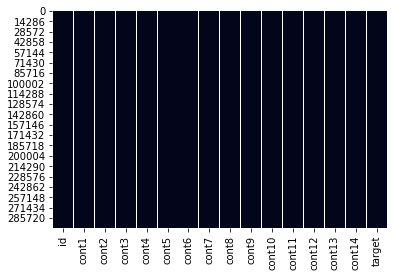

In [6]:
sns.heatmap(train.isnull(), cbar = False);

# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f244429c590>,
      dtype=object)

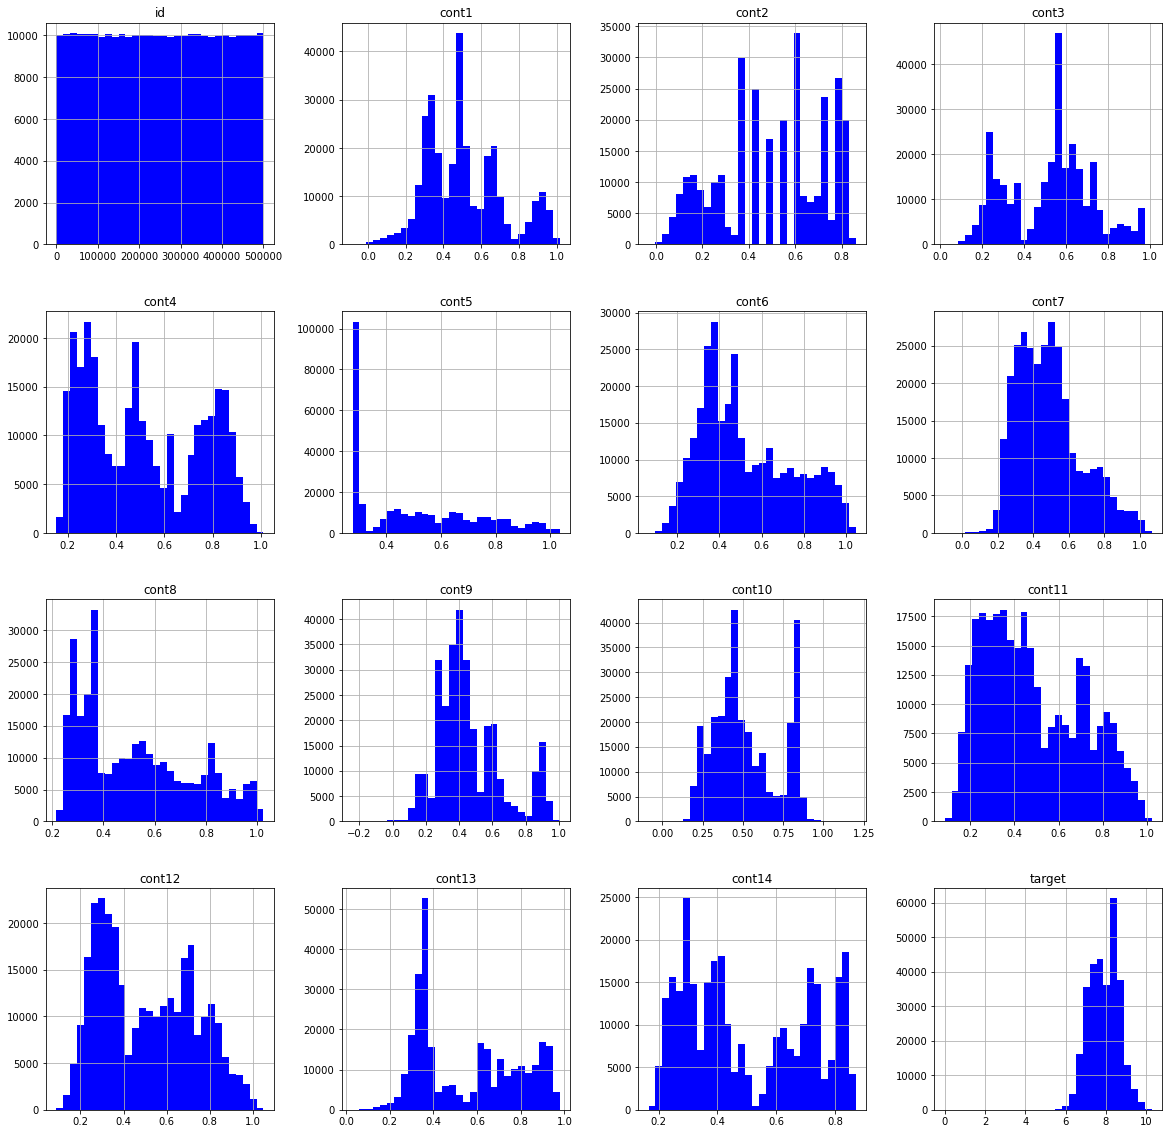

In [7]:
train.hist(bins = 30, figsize = (20,20), color = 'b')

# Correlation Analysis

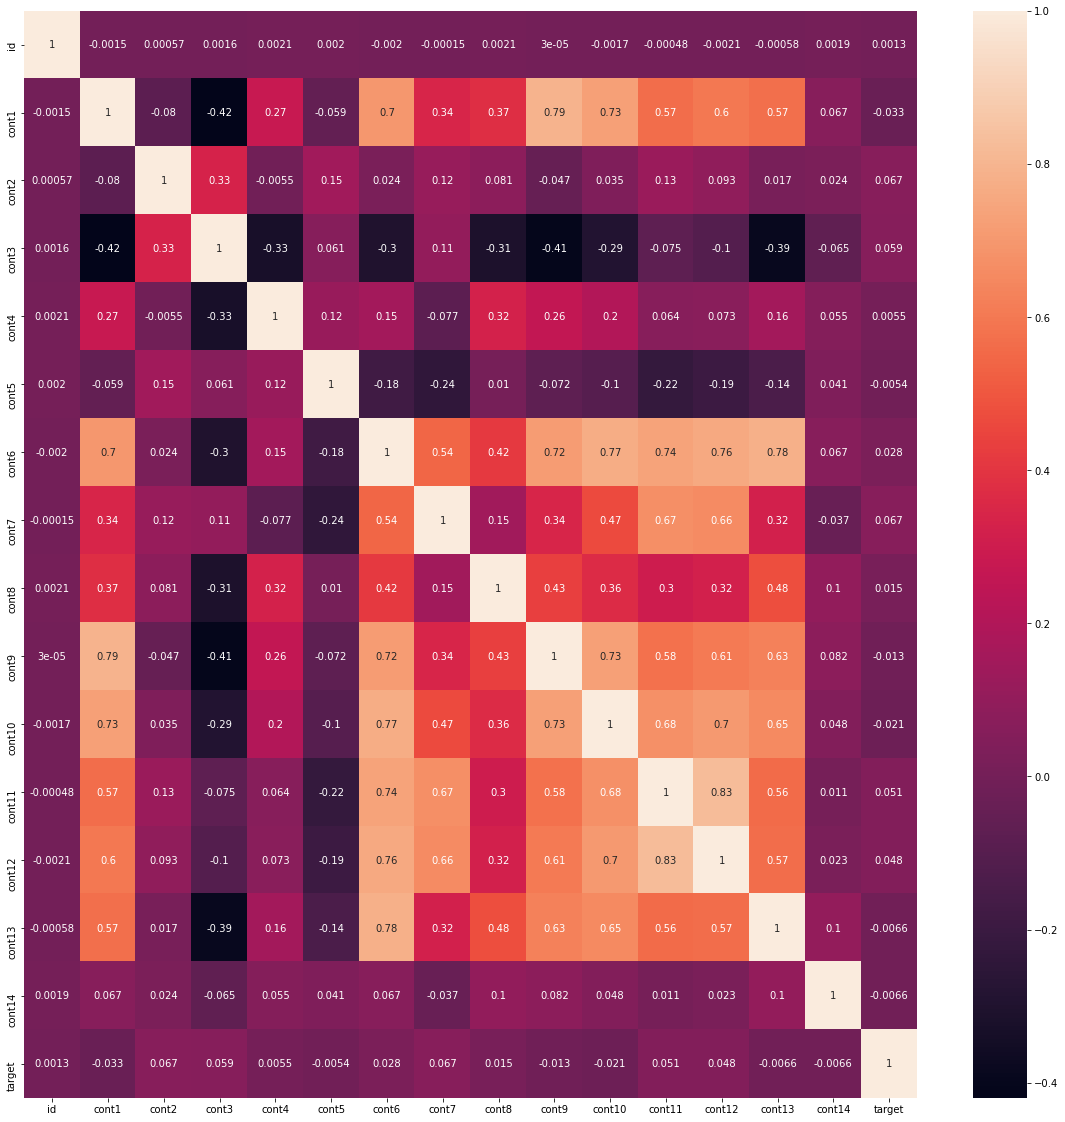

In [8]:
correlations = train.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

In [9]:
correlations = train.corr()['target'].sort_values()
correlations

cont1    -0.032994
cont10   -0.021143
cont9    -0.013029
cont13   -0.006642
cont14   -0.006609
cont5    -0.005358
id        0.001347
cont4     0.005522
cont8     0.014698
cont6     0.027955
cont12    0.047809
cont11    0.050996
cont3     0.058936
cont2     0.067102
cont7     0.067234
target    1.000000
Name: target, dtype: float64

In [10]:
X = train.drop(['id','target'], axis = 1)
y = train['target']
test = test.drop(['id'], axis= 1)

# Paramenters XGBoost, LGBM, CatBoost

In [11]:
#https://www.kaggle.com/hamzaghanmi/xgboost-hyperparameter-tuning-using-optuna

param_xgb = {'lambda': 0.0030282073258141168, 
             'alpha': 0.01563845128469084, 
             'colsample_bytree': 0.5,
             'subsample': 0.7,
             'n_estimators': 1000, 
             'learning_rate': 0.01,
             'max_depth': 15,
             'random_state': 2020, 
             'min_child_weight': 257,
             'tree_method':'gpu_hist',
             'predictor': 'gpu_predictor'}

# parameters from this awesome kernal 
# https://www.kaggle.com/hamditarek/tabular-playground-series-xgboost-lightgbm
param_lgbm ={'random_state': 33,'n_estimators':1000,
 'min_data_per_group': 5,
 'boosting_type': 'gbdt',
 'device_type' : 'gpu',
 'num_leaves': 256,
 'num_iterations' : 1000,
 'max_dept': -1,
 'learning_rate': 0.005,
 'subsample_for_bin': 200000,
 'lambda_l1': 1.074622455507616e-05,
 'lambda_l2': 2.0521330798729704e-06,
 'n_jobs': -1,
 'cat_smooth': 1.0,
 'silent': True,
 'importance_type': 'split',
 'metric': 'rmse',
 'feature_pre_filter': False,
 'bagging_fraction': 0.8206341150202605,
 'min_data_in_leaf': 100,
 'min_sum_hessian_in_leaf': 0.001,
 'bagging_freq': 6,
 'feature_fraction': 0.5,
 'min_gain_to_split': 0.0,
 'min_child_samples': 20}

#https://www.kaggle.com/bhavikjain/lgbm-xgboost-catboost-tabular-playground-series
param_cat = {'iterations': 1000,
                             'learning_rate': 0.05,
                             'depth': 10,
                             'reg_lambda': 10,
                             'eval_metric': 'RMSE',
                             'bagging_temperature': 0.2,
                             'od_type': 'Iter',
                             'metric_period': 50,
                             'od_wait': 20
}

# Stacking Model

In [12]:
%%time
kf = KFold(n_splits=5, shuffle=True, random_state=7)

oof_preds = np.zeros(X.shape[0])
sub_preds = np.zeros(test.shape[0])

for n_fold, (trn_idx, val_idx) in enumerate(kf.split(X, y)):
    X_train, y_train = X.iloc[trn_idx], y.iloc[trn_idx]
    X_valid, y_valid = X.iloc[val_idx], y.iloc[val_idx]
    level10 = list()
    level10.append(('cbr', CatBoostRegressor(**param_cat, task_type='GPU')))
    level10.append(('lgr', LGBMRegressor(**param_lgbm)))
    level10.append(('xgb', XGBRegressor(**param_xgb)))
    level10.append(('mlp', MLPRegressor()))
    
    level1 = VotingRegressor(estimators = level10, n_jobs = -1)

    model = StackingRegressor(estimators=level10, final_estimator=level1, cv=5)
    model.fit(X_train, y_train)
    oof_preds[val_idx] = model.predict(X_valid)
    pred_xgb = model.predict(test)
    sub_preds += pred_xgb / kf.n_splits

print(np.sqrt(mean_squared_error(y, oof_preds)))

0:	learn: 0.7316132	total: 18.1ms	remaining: 18.1s
50:	learn: 0.7123587	total: 465ms	remaining: 8.66s
100:	learn: 0.7061295	total: 901ms	remaining: 8.02s
150:	learn: 0.7014030	total: 1.3s	remaining: 7.32s
200:	learn: 0.6972243	total: 1.7s	remaining: 6.75s
250:	learn: 0.6932970	total: 2.1s	remaining: 6.25s
300:	learn: 0.6897593	total: 2.89s	remaining: 6.72s
350:	learn: 0.6863413	total: 3.89s	remaining: 7.19s
400:	learn: 0.6833766	total: 4.29s	remaining: 6.41s
450:	learn: 0.6805731	total: 4.69s	remaining: 5.71s
500:	learn: 0.6777751	total: 5.08s	remaining: 5.06s
550:	learn: 0.6751974	total: 5.49s	remaining: 4.47s
600:	learn: 0.6729551	total: 5.88s	remaining: 3.9s
650:	learn: 0.6710768	total: 6.28s	remaining: 3.36s
700:	learn: 0.6693792	total: 6.67s	remaining: 2.85s
750:	learn: 0.6678831	total: 7.07s	remaining: 2.35s
800:	learn: 0.6660189	total: 7.47s	remaining: 1.85s
850:	learn: 0.6645222	total: 7.89s	remaining: 1.38s
900:	learn: 0.6633578	total: 8.3s	remaining: 912ms
950:	learn: 0.66229

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0:	learn: 0.7308505	total: 10ms	remaining: 9.99s
50:	learn: 0.7101803	total: 456ms	remaining: 8.48s
100:	learn: 0.7034957	total: 847ms	remaining: 7.54s
150:	learn: 0.6981724	total: 1.24s	remaining: 6.97s
200:	learn: 0.6936466	total: 1.63s	remaining: 6.48s
250:	learn: 0.6899700	total: 2.02s	remaining: 6.03s
300:	learn: 0.6867189	total: 2.42s	remaining: 5.61s
350:	learn: 0.6840211	total: 2.81s	remaining: 5.2s
400:	learn: 0.6816716	total: 3.21s	remaining: 4.79s
450:	learn: 0.6794138	total: 3.61s	remaining: 4.39s
500:	learn: 0.6772416	total: 4.01s	remaining: 3.99s
550:	learn: 0.6752179	total: 4.44s	remaining: 3.62s
600:	learn: 0.6730167	total: 4.84s	remaining: 3.21s
650:	learn: 0.6712912	total: 5.24s	remaining: 2.81s
700:	learn: 0.6694101	total: 5.63s	remaining: 2.4s
750:	learn: 0.6679275	total: 6.03s	remaining: 2s
800:	learn: 0.6647963	total: 6.56s	remaining: 1.63s
850:	learn: 0.6616851	total: 7.11s	remaining: 1.25s
900:	learn: 0.6589171	total: 7.52s	remaining: 826ms
950:	learn: 0.6564246

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0:	learn: 0.7322849	total: 10.3ms	remaining: 10.3s
50:	learn: 0.7133398	total: 481ms	remaining: 8.95s
100:	learn: 0.7074244	total: 882ms	remaining: 7.85s
150:	learn: 0.7028189	total: 1.28s	remaining: 7.23s
200:	learn: 0.6992229	total: 1.73s	remaining: 6.86s
250:	learn: 0.6959779	total: 2.13s	remaining: 6.36s
300:	learn: 0.6933119	total: 2.54s	remaining: 5.89s
350:	learn: 0.6909067	total: 2.95s	remaining: 5.46s
400:	learn: 0.6887135	total: 3.36s	remaining: 5.01s
450:	learn: 0.6865703	total: 3.85s	remaining: 4.69s
500:	learn: 0.6846015	total: 4.36s	remaining: 4.34s
550:	learn: 0.6827216	total: 4.88s	remaining: 3.98s
600:	learn: 0.6809040	total: 5.29s	remaining: 3.51s
650:	learn: 0.6788024	total: 5.7s	remaining: 3.05s
700:	learn: 0.6768981	total: 6.1s	remaining: 2.6s
750:	learn: 0.6752038	total: 6.51s	remaining: 2.16s
800:	learn: 0.6732845	total: 6.92s	remaining: 1.72s
850:	learn: 0.6712724	total: 7.32s	remaining: 1.28s
900:	learn: 0.6694211	total: 7.72s	remaining: 849ms
950:	learn: 0.667

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0:	learn: 0.7316361	total: 10.5ms	remaining: 10.5s
50:	learn: 0.7113371	total: 515ms	remaining: 9.59s
100:	learn: 0.7040359	total: 923ms	remaining: 8.21s
150:	learn: 0.6993059	total: 1.32s	remaining: 7.45s
200:	learn: 0.6949381	total: 1.73s	remaining: 6.87s
250:	learn: 0.6912045	total: 2.13s	remaining: 6.34s
300:	learn: 0.6877828	total: 2.52s	remaining: 5.86s
350:	learn: 0.6848264	total: 2.92s	remaining: 5.41s
400:	learn: 0.6820129	total: 3.32s	remaining: 4.96s
450:	learn: 0.6796786	total: 3.72s	remaining: 4.53s
500:	learn: 0.6777943	total: 4.12s	remaining: 4.11s
550:	learn: 0.6754070	total: 4.52s	remaining: 3.69s
600:	learn: 0.6731024	total: 4.92s	remaining: 3.27s
650:	learn: 0.6709650	total: 5.32s	remaining: 2.85s
700:	learn: 0.6689871	total: 5.72s	remaining: 2.44s
750:	learn: 0.6671220	total: 6.12s	remaining: 2.03s
800:	learn: 0.6654120	total: 6.53s	remaining: 1.62s
850:	learn: 0.6635525	total: 6.92s	remaining: 1.21s
900:	learn: 0.6621046	total: 7.47s	remaining: 820ms
950:	learn: 0.

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0:	learn: 0.7316776	total: 10.5ms	remaining: 10.5s
50:	learn: 0.7129558	total: 453ms	remaining: 8.42s
100:	learn: 0.7063398	total: 865ms	remaining: 7.7s
150:	learn: 0.7018211	total: 1.27s	remaining: 7.12s
200:	learn: 0.6979346	total: 1.67s	remaining: 6.62s
250:	learn: 0.6944003	total: 2.07s	remaining: 6.17s
300:	learn: 0.6908837	total: 2.47s	remaining: 5.74s
350:	learn: 0.6880738	total: 2.87s	remaining: 5.3s
400:	learn: 0.6846915	total: 3.27s	remaining: 4.89s
450:	learn: 0.6816435	total: 3.67s	remaining: 4.47s
500:	learn: 0.6787767	total: 4.09s	remaining: 4.07s
550:	learn: 0.6760734	total: 4.52s	remaining: 3.69s
600:	learn: 0.6738033	total: 4.92s	remaining: 3.27s
650:	learn: 0.6714801	total: 5.33s	remaining: 2.86s
700:	learn: 0.6692451	total: 5.74s	remaining: 2.45s
750:	learn: 0.6668924	total: 6.15s	remaining: 2.04s
800:	learn: 0.6645653	total: 6.55s	remaining: 1.63s
850:	learn: 0.6623005	total: 6.96s	remaining: 1.22s
900:	learn: 0.6603452	total: 7.42s	remaining: 815ms
950:	learn: 0.65

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0:	learn: 0.7311424	total: 10ms	remaining: 10s
50:	learn: 0.7114777	total: 494ms	remaining: 9.2s
100:	learn: 0.7046239	total: 893ms	remaining: 7.94s
150:	learn: 0.6993759	total: 1.29s	remaining: 7.26s
200:	learn: 0.6948593	total: 1.69s	remaining: 6.71s
250:	learn: 0.6908388	total: 2.08s	remaining: 6.2s
300:	learn: 0.6872832	total: 2.48s	remaining: 5.76s
350:	learn: 0.6844232	total: 2.9s	remaining: 5.36s
400:	learn: 0.6819115	total: 3.29s	remaining: 4.91s
450:	learn: 0.6799765	total: 3.78s	remaining: 4.6s
500:	learn: 0.6776196	total: 4.36s	remaining: 4.34s
550:	learn: 0.6754093	total: 4.79s	remaining: 3.9s
600:	learn: 0.6734405	total: 5.18s	remaining: 3.44s
650:	learn: 0.6715987	total: 5.57s	remaining: 2.98s
700:	learn: 0.6696839	total: 5.96s	remaining: 2.54s
750:	learn: 0.6679073	total: 6.35s	remaining: 2.1s
800:	learn: 0.6658326	total: 6.74s	remaining: 1.67s
850:	learn: 0.6641447	total: 7.13s	remaining: 1.25s
900:	learn: 0.6628589	total: 7.52s	remaining: 826ms
950:	learn: 0.6615339	to

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0:	learn: 0.7318435	total: 10.3ms	remaining: 10.3s
50:	learn: 0.7129969	total: 533ms	remaining: 9.92s
100:	learn: 0.7067492	total: 939ms	remaining: 8.36s
150:	learn: 0.7025389	total: 1.34s	remaining: 7.55s
200:	learn: 0.6988240	total: 1.78s	remaining: 7.07s
250:	learn: 0.6952788	total: 2.18s	remaining: 6.51s
300:	learn: 0.6924710	total: 2.59s	remaining: 6.01s
350:	learn: 0.6900180	total: 2.98s	remaining: 5.52s
400:	learn: 0.6878727	total: 3.38s	remaining: 5.05s
450:	learn: 0.6854769	total: 3.78s	remaining: 4.6s
500:	learn: 0.6832451	total: 4.28s	remaining: 4.26s
550:	learn: 0.6809951	total: 5.07s	remaining: 4.13s
600:	learn: 0.6788572	total: 5.62s	remaining: 3.73s
650:	learn: 0.6768580	total: 6.02s	remaining: 3.23s
700:	learn: 0.6749341	total: 6.42s	remaining: 2.74s
750:	learn: 0.6727537	total: 6.82s	remaining: 2.26s
800:	learn: 0.6706201	total: 7.23s	remaining: 1.79s
850:	learn: 0.6684366	total: 7.63s	remaining: 1.33s
900:	learn: 0.6665561	total: 8.04s	remaining: 884ms
950:	learn: 0.6

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0:	learn: 0.7309264	total: 10ms	remaining: 10s
50:	learn: 0.7107318	total: 537ms	remaining: 10s
100:	learn: 0.7033834	total: 948ms	remaining: 8.44s
150:	learn: 0.6983532	total: 1.35s	remaining: 7.57s
200:	learn: 0.6940443	total: 1.75s	remaining: 6.94s
250:	learn: 0.6903571	total: 2.14s	remaining: 6.39s
300:	learn: 0.6867846	total: 2.54s	remaining: 5.89s
350:	learn: 0.6831049	total: 2.93s	remaining: 5.42s
400:	learn: 0.6796220	total: 3.33s	remaining: 4.98s
450:	learn: 0.6767043	total: 3.74s	remaining: 4.55s
500:	learn: 0.6738316	total: 4.13s	remaining: 4.12s
550:	learn: 0.6707707	total: 4.53s	remaining: 3.69s
600:	learn: 0.6682027	total: 4.93s	remaining: 3.27s
650:	learn: 0.6656848	total: 5.32s	remaining: 2.85s
700:	learn: 0.6637747	total: 5.72s	remaining: 2.44s
750:	learn: 0.6613770	total: 6.12s	remaining: 2.03s
800:	learn: 0.6591119	total: 6.52s	remaining: 1.62s
850:	learn: 0.6565291	total: 7.1s	remaining: 1.24s
900:	learn: 0.6547858	total: 7.65s	remaining: 841ms
950:	learn: 0.6531007

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0:	learn: 0.7319189	total: 10.9ms	remaining: 10.9s
50:	learn: 0.7127165	total: 573ms	remaining: 10.7s
100:	learn: 0.7065482	total: 986ms	remaining: 8.78s
150:	learn: 0.7017766	total: 1.39s	remaining: 7.83s
200:	learn: 0.6981071	total: 1.79s	remaining: 7.14s
250:	learn: 0.6948859	total: 2.2s	remaining: 6.56s
300:	learn: 0.6918415	total: 2.6s	remaining: 6.05s
350:	learn: 0.6890845	total: 3.01s	remaining: 5.57s
400:	learn: 0.6867170	total: 3.41s	remaining: 5.1s
450:	learn: 0.6846545	total: 3.82s	remaining: 4.65s
500:	learn: 0.6822491	total: 4.22s	remaining: 4.21s
550:	learn: 0.6801615	total: 4.63s	remaining: 3.77s
600:	learn: 0.6779460	total: 5.03s	remaining: 3.34s
650:	learn: 0.6760367	total: 5.44s	remaining: 2.92s
700:	learn: 0.6741639	total: 5.84s	remaining: 2.49s
750:	learn: 0.6721297	total: 6.38s	remaining: 2.11s
800:	learn: 0.6701729	total: 6.93s	remaining: 1.72s
850:	learn: 0.6684472	total: 7.37s	remaining: 1.29s
900:	learn: 0.6665312	total: 7.78s	remaining: 854ms
950:	learn: 0.664

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0:	learn: 0.7313152	total: 10.2ms	remaining: 10.2s
50:	learn: 0.7108347	total: 494ms	remaining: 9.18s
100:	learn: 0.7048938	total: 974ms	remaining: 8.67s
150:	learn: 0.6999414	total: 1.36s	remaining: 7.68s
200:	learn: 0.6960318	total: 1.75s	remaining: 6.98s
250:	learn: 0.6924432	total: 2.15s	remaining: 6.4s
300:	learn: 0.6889802	total: 2.54s	remaining: 5.9s
350:	learn: 0.6859255	total: 2.93s	remaining: 5.42s
400:	learn: 0.6835088	total: 3.34s	remaining: 4.99s
450:	learn: 0.6815399	total: 3.73s	remaining: 4.54s
500:	learn: 0.6793560	total: 4.2s	remaining: 4.19s
550:	learn: 0.6769876	total: 4.83s	remaining: 3.94s
600:	learn: 0.6749297	total: 5.22s	remaining: 3.47s
650:	learn: 0.6727929	total: 5.62s	remaining: 3.02s
700:	learn: 0.6707690	total: 6.02s	remaining: 2.57s
750:	learn: 0.6694846	total: 6.42s	remaining: 2.13s
800:	learn: 0.6673774	total: 6.81s	remaining: 1.69s
850:	learn: 0.6664233	total: 7.2s	remaining: 1.26s
900:	learn: 0.6652833	total: 7.59s	remaining: 835ms
950:	learn: 0.6635

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.697150970935807
CPU times: user 3h 27min 36s, sys: 13min 4s, total: 3h 40min 41s
Wall time: 3h 9min 37s


# Submission

In [13]:
# Make submission
sample_submission['target'] = sub_preds
sample_submission.to_csv("stacking_submission.csv", index=False)
sample_submission.head()

,id,target
0,0,7.974906
1,2,7.869025
2,6,7.931703
3,7,8.313256
4,10,8.153990
